# Employee Turnover Predictions

# Problem: 
### The employee turnover 


The employee turnover problem is one of the most common problems at work. As per the Center of American progress, the cost of replacing an employee is 20% of that worker's yearly income.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__author__ = "Ajay Mishra"
__email__ = "ajaykmishra2000@gmail.com"

## Part 2 - DISCOVER

### ---- Reading the data ----

In [2]:
df = pd.read_csv('Employee Turnover/data/HR-data.csv')
df.shape

(14999, 10)

In [3]:
# examine the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

### ---- Data Cleaning ----

In [5]:
# checking for missing value in the dataset
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
# rename columns
df = df.rename(columns = {'satisfaction_level':'satisfaction',
                         'last_evaluation':'evaluation',
                         'number_project':'projectCount',
                         'average_montly_hours':'AvgMonthlyHours',
                         'time_spend_company':'yearsAtCompany',
                         'Work_accident':'accidentAtWork',
                         'left':'turnover',
                         'promotion_last_5years':'promotion',
                         'sales':'department'})
df.head()

,satisfaction,evaluation,projectCount,AvgMonthlyHours,yearsAtCompany,accidentAtWork,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction       14999 non-null float64
evaluation         14999 non-null float64
projectCount       14999 non-null int64
AvgMonthlyHours    14999 non-null int64
yearsAtCompany     14999 non-null int64
accidentAtWork     14999 non-null int64
turnover           14999 non-null int64
promotion          14999 non-null int64
department         14999 non-null object
salary             14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.describe()

,satisfaction,evaluation,projectCount,AvgMonthlyHours,yearsAtCompany,accidentAtWork,turnover,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.dtypes

satisfaction       float64
evaluation         float64
projectCount         int64
AvgMonthlyHours      int64
yearsAtCompany       int64
accidentAtWork       int64
turnover             int64
promotion            int64
department          object
salary              object
dtype: object

In [11]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
df.duplicated().sum()

3008

In [12]:
#df = df.drop_duplicates().reset_index(drop=True)
#df.head()

### ---- EDA ----

In [13]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [14]:
df['turnover'].value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [15]:
# calculate turnover rates
turnover_rate = df.turnover.value_counts()/df.shape[0]
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [16]:
# statistical overview of dataset
df.describe()

,satisfaction,evaluation,projectCount,AvgMonthlyHours,yearsAtCompany,accidentAtWork,turnover,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
trunover_Summary=df.groupby('turnover')
trunover_Summary.agg('mean')

,satisfaction,evaluation,projectCount,AvgMonthlyHours,yearsAtCompany,accidentAtWork,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [18]:
trunover_Summary.std()

,satisfaction,evaluation,projectCount,AvgMonthlyHours,yearsAtCompany,accidentAtWork,promotion
turnover,,,,,,,
0,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
1,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759


### ---- Correlation Matrix ----

,satisfaction,evaluation,projectCount,AvgMonthlyHours,yearsAtCompany,accidentAtWork,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
AvgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidentAtWork,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


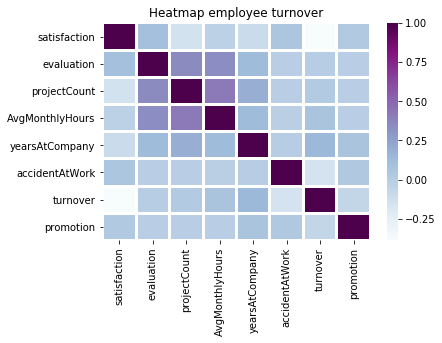

In [19]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap='BuPu',
           linewidth=2)
plt.title('Heatmap employee turnover')
corr

In [20]:
corr.columns.values

array(['satisfaction', 'evaluation', 'projectCount', 'AvgMonthlyHours',
       'yearsAtCompany', 'accidentAtWork', 'turnover', 'promotion'],
      dtype=object)

### --- Distribution of features ---

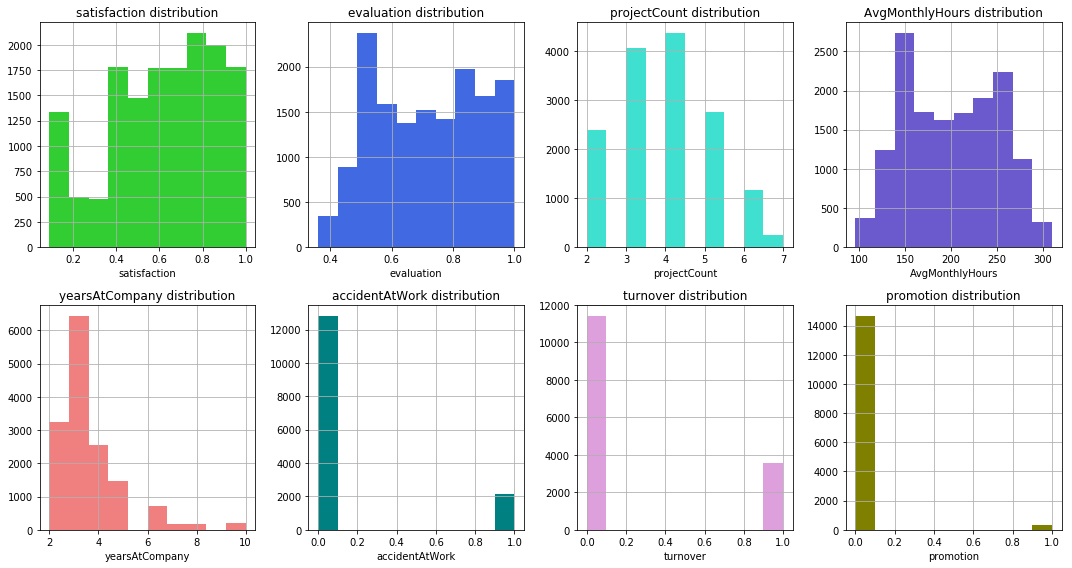

In [21]:
fig = plt.figure(figsize=(15,8))

# satisfaction distribution
ax1 = fig.add_subplot(241)
df.hist(column='satisfaction',ax=ax1, color='limegreen')
ax1.set_xlabel('satisfaction')
ax1.set_title('satisfaction distribution')

# evaluation distribution
ax2 = fig.add_subplot(242)
df.hist(column='evaluation',ax=ax2, color='royalblue')
ax2.set_xlabel('evaluation')
ax2.set_title('evaluation distribution')

# projectCount distribution
ax3 = fig.add_subplot(243)
df.hist(column='projectCount',ax=ax3, color='turquoise')
ax3.set_xlabel('projectCount')
ax3.set_title('projectCount distribution')

# AvgMonthlyHours distribution
ax4 = fig.add_subplot(244)
df.hist(column='AvgMonthlyHours',ax=ax4, color='slateblue')
ax4.set_xlabel('AvgMonthlyHours')
ax4.set_title('AvgMonthlyHours distribution')

# yearsAtCompany distribution
ax5 = fig.add_subplot(245)
df.hist(column='yearsAtCompany',ax=ax5, color='lightcoral')
ax5.set_xlabel('yearsAtCompany')
ax5.set_title('yearsAtCompany distribution')

# accidentAtWork distribution
ax6 = fig.add_subplot(246)
df.hist(column='accidentAtWork',ax=ax6, color='teal')
ax6.set_xlabel('accidentAtWork')
ax6.set_title('accidentAtWork distribution')

# turnover distribution
ax7 = fig.add_subplot(247)
df.hist(column='turnover',ax=ax7, color='plum')
ax7.set_xlabel('turnover')
ax7.set_title('turnover distribution')

# promotion distribution
ax8 = fig.add_subplot(248)
df.hist(column='promotion',ax=ax8, color='olive')
ax8.set_xlabel('promotion')
ax8.set_title('promotion distribution')

plt.tight_layout()
plt.show()

Text(0.5,1,'satisfaction Vs evaluation')

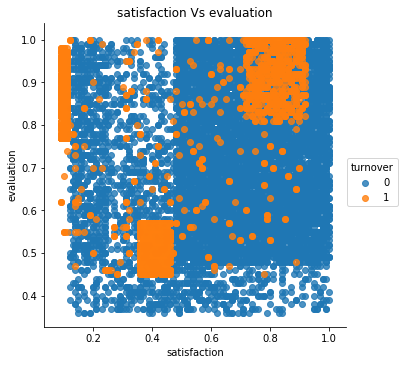

In [22]:
sns.lmplot(x='satisfaction',y='evaluation',data=df,
          fit_reg=False,
          hue='turnover')
plt.title('satisfaction Vs evaluation')

Text(0.5,1,'evaluation Vs AvgMonthlyHours')

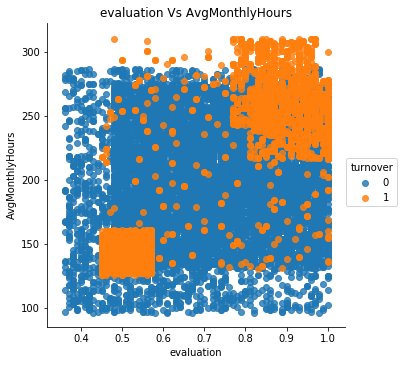

In [23]:
sns.lmplot(x='evaluation',y='AvgMonthlyHours',data=df,
          fit_reg=False,
          hue='turnover')
plt.title('evaluation Vs AvgMonthlyHours')

Text(0.5,1,'satisfaction Vs AvgMonthlyHours')

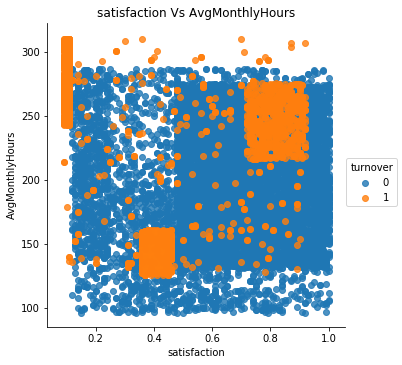

In [24]:
sns.lmplot(x='satisfaction',y='AvgMonthlyHours',data=df,
          fit_reg=False,
          hue='turnover')
plt.title('satisfaction Vs AvgMonthlyHours')

### --- Clustering employee turnover ---

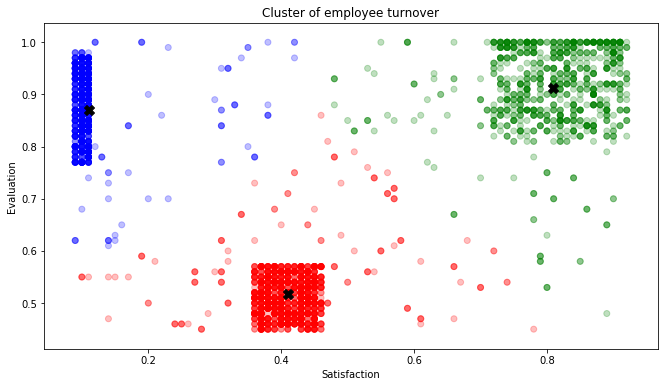

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][['satisfaction','evaluation']])
kmeans.labels_
#kmeans.inertia_
#kmeans.n_iter_
#kmeans.cluster_centers_ 
kmeans_color = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(11,6))
plt.scatter(x='satisfaction',y='evaluation', data=df[df['turnover']==1],
           alpha=0.25, color=kmeans_color)
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],marker='X',color='black',s=100)
plt.title('Cluster of employee turnover')
#plt.tight_layout()
plt.show()

In [26]:
len(kmeans.labels_)

3571

Text(0.5,1,'Employee Satisfaction Distribution: Turnover Vs No Turnover')

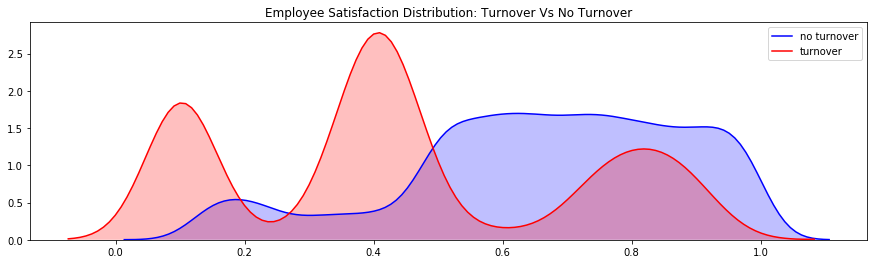

In [27]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df[df['turnover']==0]['satisfaction'],color='b', shade=True, label='no turnover')
ax=sns.kdeplot(df[df['turnover']==1]['satisfaction'],color='r', shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution: Turnover Vs No Turnover')

### --- Project Count ---

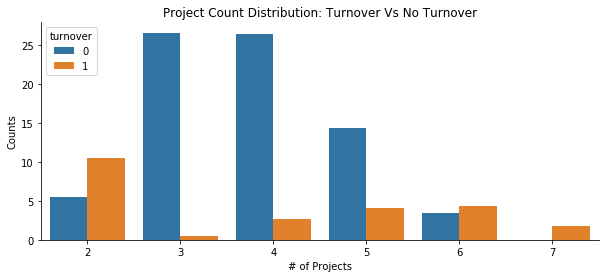

In [28]:
fig,ax = plt.subplots(figsize=(10,4))
sns.barplot(x='projectCount',y='projectCount', hue='turnover',data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(xlabel='# of Projects', ylabel = 'Counts',
      title='Project Count Distribution: Turnover Vs No Turnover')
sns.despine()


### ---- Turnover by Department   ----

In [29]:
df[df['turnover']==1]['department'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: department, dtype: int64

In [30]:
emp_left = df[df['turnover']==1]
emp_left = pd.DataFrame(emp_left.department.value_counts()).reset_index()
emp_left
emp_total = pd.DataFrame(df.department.value_counts()).reset_index()
emp_total

employee_df = pd.merge(emp_total,emp_left,how='inner',on='index')
employee_df = employee_df.rename(columns = {'index':'department','department_x':'EmployeeTotal','department_y':'EmployeeLeft'})
employee_df

,department,EmployeeTotal,EmployeeLeft
0,sales,4140,1014
1,technical,2720,697
2,support,2229,555
3,IT,1227,273
4,product_mng,902,198
5,marketing,858,203
6,RandD,787,121
7,accounting,767,204
8,hr,739,215
9,management,630,91


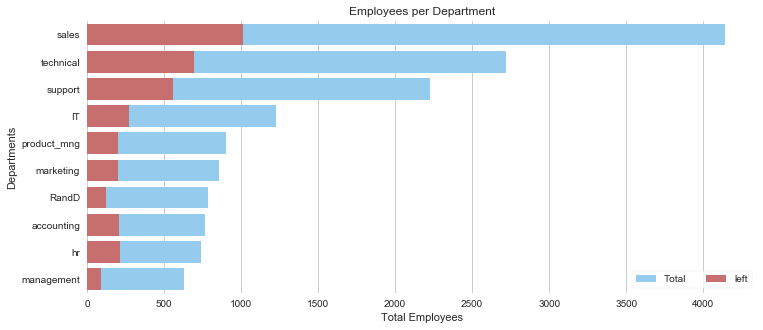

In [31]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(figsize=(12,5))

sns.set_color_codes("pastel")
sns.barplot(x='EmployeeTotal',y='department',data=employee_df,
            label='Total', color='lightskyblue')

sns.set_color_codes("muted")
sns.barplot(x='EmployeeLeft',y='department',data=employee_df,
            label='left',color='r')

ax.legend(ncol=2, loc="lower right",frameon=True)
ax.set(xlabel='Total Employees',ylabel='Departments',
      title='Employees per Department')
sns.despine(left=True, bottom=True)

### ---- Average Monthly Hours ----

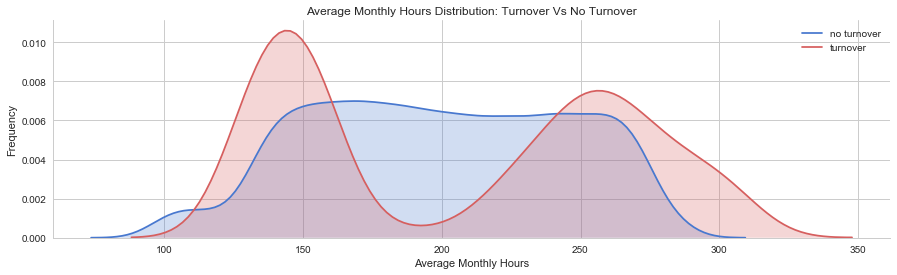

In [32]:
f, ax = plt.subplots(figsize=(15,4))
ax = sns.kdeplot(df[df['turnover']==0]['AvgMonthlyHours'],color='b',shade=True, label='no turnover')
ax = sns.kdeplot(df[df['turnover']==1]['AvgMonthlyHours'],color='r',shade=True, label='turnover')

ax.set(xlabel='Average Monthly Hours', ylabel='Frequency',
      title='Average Monthly Hours Distribution: Turnover Vs No Turnover')
sns.despine()

### ---- Preprocessing ----

In [33]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [34]:
cat_var = ['turnover','department','salary','promotion']
num_var = ['satisfaction','evaluation','projectCount','AvgMonthlyHours','yearsAtCompany','accidentAtWork']
df_cat = pd.get_dummies(df[cat_var],drop_first=True)
df_num = df[num_var]
new_df = pd.concat([df_cat,df_num], axis=1)
new_df.head()

,turnover,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction,evaluation,projectCount,AvgMonthlyHours,yearsAtCompany,accidentAtWork
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0


### ---- Class Balance ----

In [35]:
turnover_rate = new_df['turnover'].value_counts()/new_df.shape[0]
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [36]:
#turnover_rate.values
#turnover_rate.index

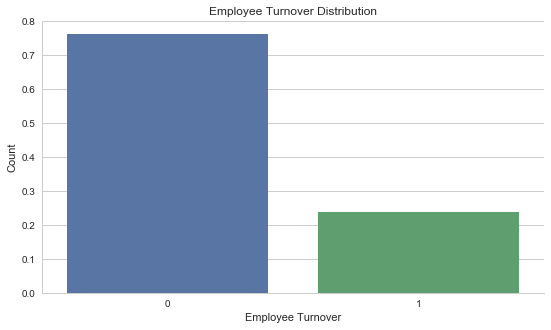

In [37]:
f,ax = plt.subplots(figsize=(9,5))
sns.barplot(x=turnover_rate.index,y=turnover_rate.values,data=new_df)
ax.set(xlabel='Employee Turnover',ylabel='Count',
      title='Employee Turnover Distribution')
sns.despine()


### ---- Split dataset: Training / Test ----

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, confusion_matrix, precision_recall_curve 

X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

### ---- Resample data ----

In [39]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
#upsample Minority class
X_train_up, y_train_up = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_up = np.concatenate((X_train[y_train==0],X_train_up))
y_train_up = np.concatenate((y_train[y_train==0],y_train_up))

# Upscale using SMOTE

sm = SMOTE(random_state=12, ratio=1.0)
X_train_sm,y_train_sm = sm.fit_sample(X_train,y_train)

#downsample Majority class
X_train_dn, y_train_dn = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)

X_train_dn = np.concatenate((X_train[y_train==1],X_train_dn))
y_train_dn = np.concatenate((y_train[y_train==1],y_train_dn))


print('Original Shape ====>',X_train.shape,y_train.shape)

print('Upsample Shape ====>',X_train_up.shape,y_train_up.shape)

print('SMOTE Shape    ====>',X_train_sm.shape,y_train_sm.shape)

print('Downsample Shape ==>',X_train_dn.shape,y_train_dn.shape)


C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Original Shape ====> (11999, 18) (11999,)
Upsample Shape ====> (18284, 18) (18284,)
SMOTE Shape    ====> (18284, 18) (18284,)
Downsample Shape ==> (5714, 18) (5714,)


### ---- Chossing best Sampling technique ----    

#### The Best sampling method is SMOTE

#### - Trained logistic regression on all sampled datasets

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

resample_methods = {'Original':(X_train,y_train),
                   'Upsampled':(X_train_up,y_train_up),
                   'SMOTE':(X_train_sm,y_train_sm),
                   'Downsampled':(X_train_dn,y_train_dn)}

for method in resample_methods.keys():
    #print(method)
    lr_results = cross_val_score(LogisticRegression(solver='liblinear'),resample_methods[method][0],resample_methods[method][1],cv=5,scoring='f1')
    print('The best F1 score {method} data',method,'method' ,'=====>',lr_results.mean())
    
cross_val_score(LogisticRegression(class_weight='balanced'),X_train,y_train,cv=5,scoring='f1').mean()
#cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 score {method} data Original method =====> 0.4496346788932494
The best F1 score {method} data Upsampled method =====> 0.7793364543526724
The best F1 score {method} data SMOTE method =====> 0.7880562801129458
The best F1 score {method} data Downsampled method =====> 0.7785231984040071


C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-package

0.6091127190611549

### ---- Train models ----


- Logistic Regression
- Random Forest
- Gradient Boosting Classification

#### Logistic Regression f1 score: 0.78

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

lr = LogisticRegression()
lr = lr.fit(X_train_sm,y_train_sm)

lr.predict(X_test)
lr_auc = roc_auc_score(y_test,lr.predict(X_test))

print('Logistic regression AUC = %2.2f' % lr_auc)

print(classification_report(y_test,lr.predict(X_test)))

C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression AUC = 0.78
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.51      0.81      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



#### Random Forest 

- 5 fold cross validation on Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_result = cross_val_score(rf,X_train_sm,y_train_sm,cv=5,scoring='f1')
rf_result.mean()

C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

0.9868393110246434

- Random Forest F1 score: 0.99

In [44]:
rf = RandomForestClassifier(n_estimators=100)

rf = rf.fit(X_train_sm,y_train_sm)

rf_auc = roc_auc_score(y_test,rf.predict(X_test))

print('Random Forest AUC is %2.2f'% rf_auc)

print(classification_report(y_test,rf.predict(X_test)))


Random Forest AUC is 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



#### Gradient Boosting Classifier

#### Gradient Boosting CLassifier f1 score: 0.98

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc =gbc.fit(X_train,y_train)

gbc_auc = roc_auc_score(y_test,gbc.predict(X_test))
print('Gradient Boosing Classifier AUC Score is %2.2f' % gbc_auc)

print(classification_report(y_test,gbc.predict(X_test)))


Gradient Boosing Classifier AUC Score is 0.96
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.93      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



### ROC Graph

In [46]:
rf.predict_proba(X_test)[:,1]

array([0.  , 0.42, 0.  , ..., 0.03, 0.01, 1.  ])

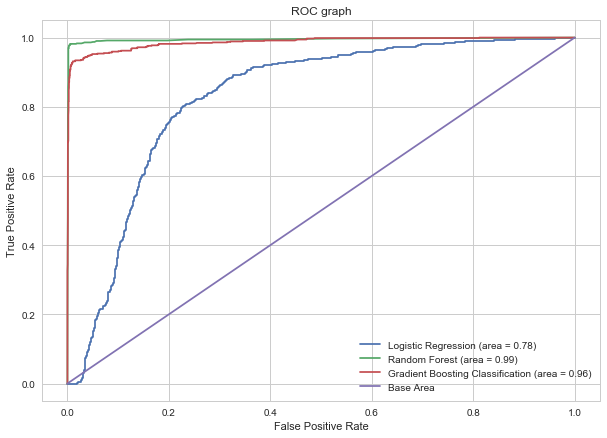

In [47]:
from sklearn.metrics import roc_curve

lr_fpr,lr_tpr, lr_thresholds = roc_curve(y_test,lr.predict_proba(X_test)[:,1])

rf_fpr,rf_tpr, rf_thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

gbc_fpr,gbc_tpr, gbc_thresholds = roc_curve(y_test,gbc.predict_proba(X_test)[:,1])

fig, ax = plt.subplots(figsize=(10,7))

# Logistic Regression AUC
plt.plot(lr_fpr,lr_tpr, label = 'Logistic Regression (area = %2.2f)' %lr_auc)
# Random Forest AUC
plt.plot(rf_fpr,rf_tpr, label = 'Random Forest (area = %2.2f)' %rf_auc)
# Gradient Boosting Classification AUC
plt.plot(gbc_fpr,gbc_tpr, label = 'Gradient Boosting Classification (area = %2.2f)' %gbc_auc)
# Base AUC
plt.plot([0,1],[0,1], label = 'Base Area')

ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC graph')

plt.legend(loc="lower right")


In [48]:
# Confusion Matrix - Logistic regression
confusion_matrix(y_test,lr.predict(X_test))

array([[1723,  563],
       [ 134,  580]], dtype=int64)

In [49]:
# Confusion Matrix - Random Forest
confusion_matrix(y_test,rf.predict(X_test))

array([[2275,   11],
       [  16,  698]], dtype=int64)

In [50]:
# Confusion Matrix - Gradient Boosting Classification
confusion_matrix(y_test,gbc.predict(X_test))

array([[2261,   25],
       [  49,  665]], dtype=int64)

### - Random Forest feature Importance

In [51]:
rf.feature_importances_

array([0.00209969, 0.00222132, 0.0022752 , 0.00271618, 0.00197365,
       0.00112789, 0.00119587, 0.00563687, 0.00473899, 0.00650196,
       0.01252397, 0.00800695, 0.27761373, 0.12093938, 0.1634541 ,
       0.12593688, 0.24013071, 0.02090664])

In [52]:
feature_importance = pd.DataFrame(rf.feature_importances_,
            index=X_test.columns,
            columns=['importance']).sort_values('importance',ascending=False)
feature_importance = feature_importance.reset_index() 
feature_importance

,index,importance
0,satisfaction,0.277614
1,yearsAtCompany,0.240131
2,projectCount,0.163454
3,AvgMonthlyHours,0.125937
4,evaluation,0.120939
5,accidentAtWork,0.020907
6,salary_low,0.012524
7,salary_medium,0.008007
8,department_technical,0.006502
9,department_sales,0.005637


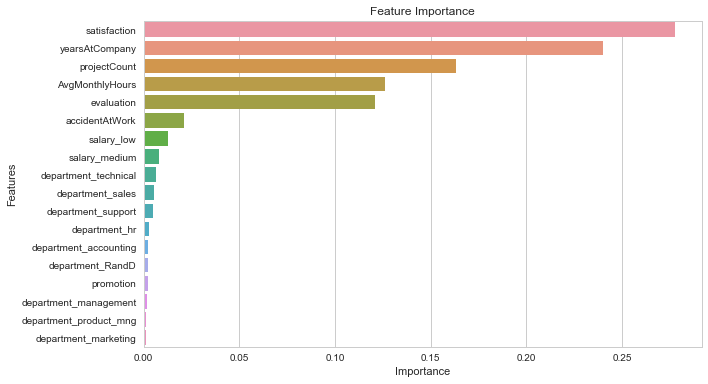

In [53]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.barplot(x='importance',y='index',data=feature_importance)
ax.set(xlabel='Importance',ylabel='Features', title='Feature Importance')
plt.show()

#### -- Apply random Noise ---

In [54]:
#np.random.normal(0,1,10)
X_train_noise = pd.DataFrame(X_train)
X_train_noise['randomNoise']=np.random.normal(0,1,X_train_noise.shape[0])

rf_random = RandomForestClassifier()
rf_normal =rf_random.fit(X_train_noise,y_train)

feature_importance_noise = pd.DataFrame(rf_random.feature_importances_,index=X_train_noise.columns,
                                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importance_noise = feature_importance_noise.reset_index() 
feature_importance_noise

C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,index,importance
0,satisfaction,0.325723
1,yearsAtCompany,0.166956
2,AvgMonthlyHours,0.157458
3,projectCount,0.155507
4,evaluation,0.134502
5,randomNoise,0.023735
6,salary_low,0.007320
7,accidentAtWork,0.007118
8,salary_medium,0.004374
9,department_sales,0.003124


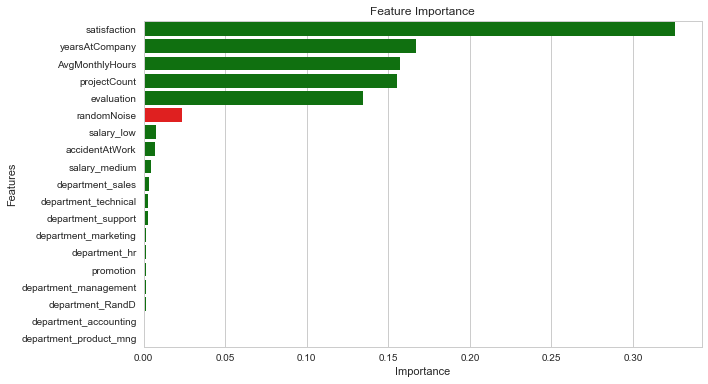

In [55]:
fig, ax = plt.subplots(figsize=(10,6)) 
clrs =['red' if (x==5) else 'green' for x in feature_importance_noise.index.values]
sns.barplot(x='importance',y='index',data=feature_importance_noise, palette=clrs)
ax.set(xlabel='Importance',ylabel='Features', title='Feature Importance')
plt.show()

### ---- Save Best Model ----

In [56]:
from sklearn.externals import joblib
joblib.dump(rf,'Employee Turnover/EmployeeTurnoverModel-v1.pkl')

['Employee Turnover/EmployeeTurnoverModel-v1.pkl']